             ID  YEAR  MONTH  GRP1  GRP2  GRP3  GRP4  GRP5  GRP6  GRP7  ...  \
0  110000085731  2020      1     0     0     0     0     0     3     0  ...   
1  110000085731  2020      2     0     0     0     0     0     1     0  ...   
2  110000085731  2020      3     0     0     0     0     0     0     0  ...   
3  110000085731  2020      4     0     0     0     0     0     0     0  ...   
4  110000085731  2020      5     0     0     0     0     0     0     0  ...   

   GRP181  GRP182  GRP183  GRP184  GRP185  GRP186  GRP187  GRP188  GRP189  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   target  
0   17615  
1   21066  
2   47915  
3   88492  
4 

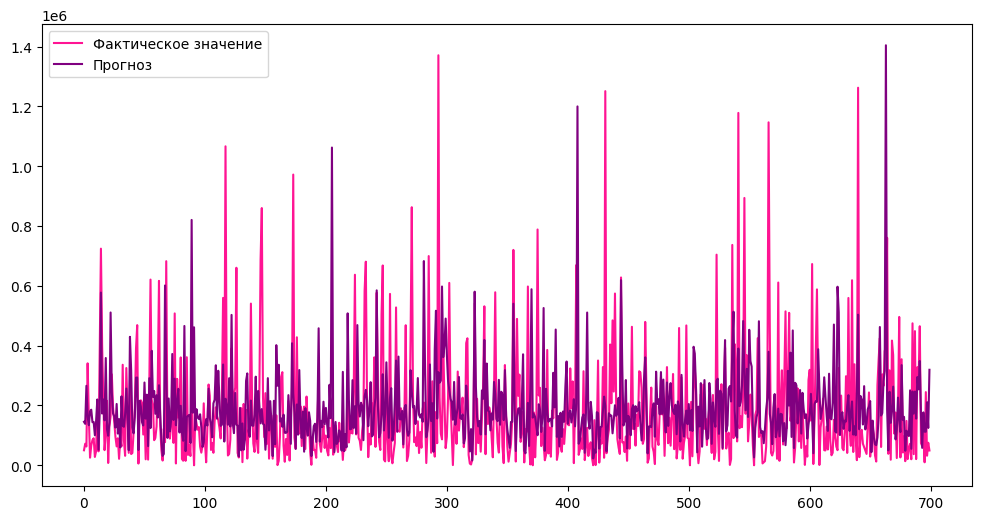

MAPE: 3.720038272716939e+18


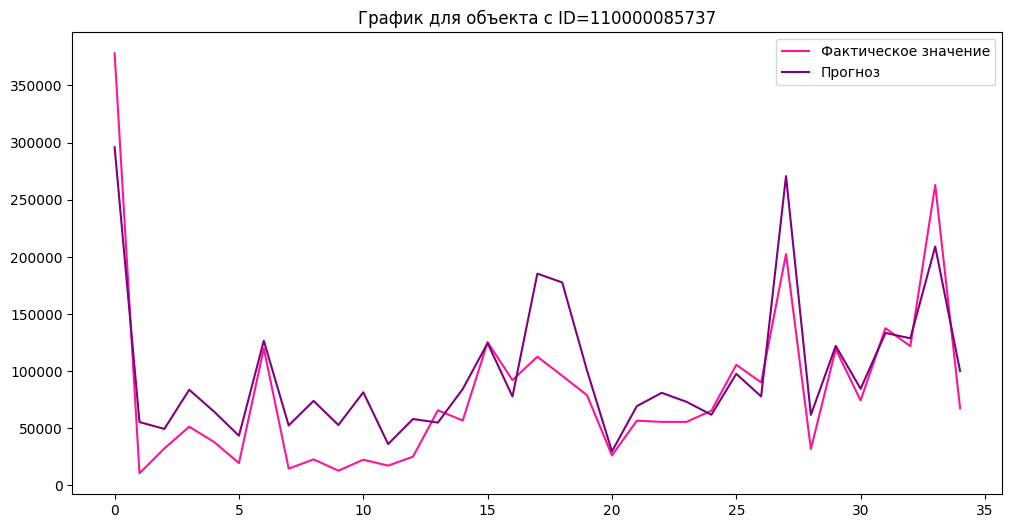

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt


data = pd.read_csv('1_train.csv')

print(data.head())
print(data.describe())

data['target'] = data['target'].shift(1, fill_value=0)

x = data.drop(['target'], axis=1)
y = data['target']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(x_train, y_train)

predictions = model.predict(x_val)

mape = mean_absolute_percentage_error(y_val, predictions)

plt.figure(figsize=(12, 6))
plt.plot(y_val.values, label='Фактическое значение', color='deeppink')
plt.plot(predictions, label='Прогноз', color='purple')
plt.legend()
plt.show()

print(f'MAPE: {mape}')

model_full = RandomForestRegressor()
model_full.fit(x, y)

def plot_data_by_id(data, id):
    plt.figure(figsize=(12, 6))
    data_id = data[data['ID'] == id]
    plt.plot(data_id['target'].values, label='Фактическое значение', color='deeppink')
    predictions_id = model_full.predict(data_id.drop(columns=['target']))
    plt.plot(predictions_id, label='Прогноз', color='purple')
    plt.legend()
    plt.title(f'График для объекта с ID={id}')
    plt.show()


plot_data_by_id(data, 110000085737)


             ID  YEAR  MONTH  GRP1  GRP2  GRP3  GRP4  GRP5  GRP6  GRP7  ...  \
0  110000085731  2020      1     0     0     0     0     0     3     0  ...   
1  110000085731  2020      2     0     0     0     0     0     1     0  ...   
2  110000085731  2020      3     0     0     0     0     0     0     0  ...   
3  110000085731  2020      4     0     0     0     0     0     0     0  ...   
4  110000085731  2020      5     0     0     0     0     0     0     0  ...   

   GRP181  GRP182  GRP183  GRP184  GRP185  GRP186  GRP187  GRP188  GRP189  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   target  
0   17615  
1   21066  
2   47915  
3   88492  
4 

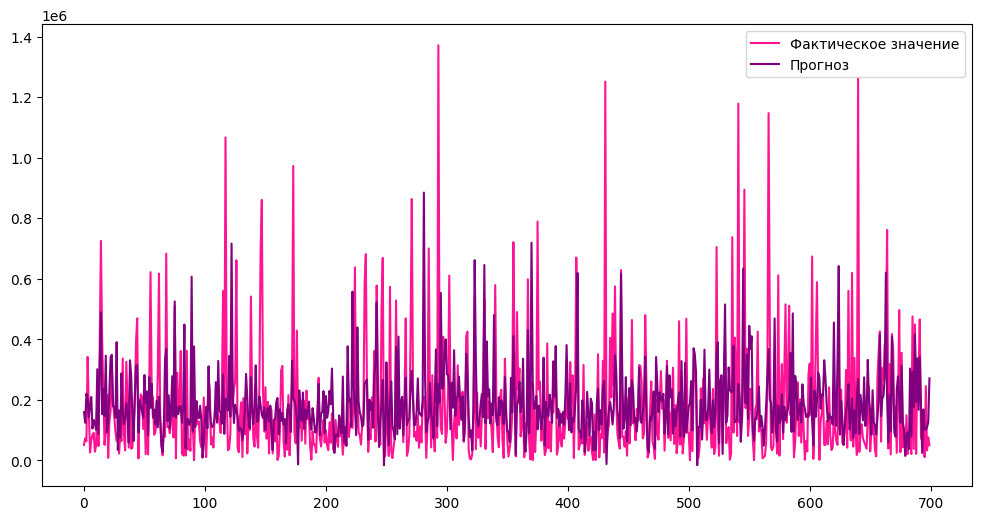

MAPE: 3.6225943595413325e+18
Learning rate set to 0.049905
0:	learn: 235277.4497645	total: 1.99ms	remaining: 1.98s
1:	learn: 234221.9709989	total: 3.77ms	remaining: 1.88s
2:	learn: 233337.0011463	total: 5.57ms	remaining: 1.85s
3:	learn: 232183.8366810	total: 7.05ms	remaining: 1.75s
4:	learn: 231280.4869989	total: 8.44ms	remaining: 1.68s
5:	learn: 230455.7870798	total: 10.3ms	remaining: 1.71s
6:	learn: 229309.7975800	total: 12.4ms	remaining: 1.76s
7:	learn: 228336.3605665	total: 14.3ms	remaining: 1.77s
8:	learn: 227243.1471072	total: 16.5ms	remaining: 1.81s
9:	learn: 226394.7657122	total: 18.3ms	remaining: 1.81s
10:	learn: 225573.5468102	total: 20.7ms	remaining: 1.86s
11:	learn: 224603.2113173	total: 22.9ms	remaining: 1.88s
12:	learn: 224048.5829160	total: 25.1ms	remaining: 1.91s
13:	learn: 223686.1300364	total: 27.2ms	remaining: 1.91s
14:	learn: 223042.7159163	total: 28.8ms	remaining: 1.89s
15:	learn: 222473.0750938	total: 30.5ms	remaining: 1.87s
16:	learn: 221677.0152978	total: 32.4ms

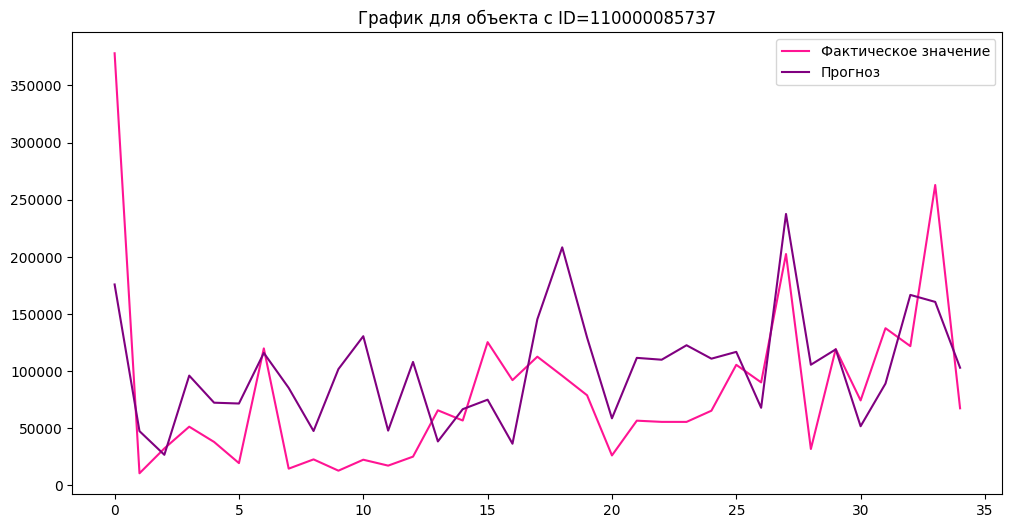

In [3]:
import pandas as pd
import numpy as np
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

data = pd.read_csv('1_train.csv')

print(data.head())
print(data.describe())

data['target'] = data['target'].shift(1, fill_value=0)

x = data.drop(['target'], axis=1)
y = data['target']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)


model = CatBoostRegressor()
model.fit(x_train, y_train)


predictions = model.predict(x_val)

mape = mean_absolute_percentage_error(y_val, predictions)


plt.figure(figsize=(12, 6))
plt.plot(y_val.values, label='Фактическое значение', color='deeppink')
plt.plot(predictions, label='Прогноз', color='purple')
plt.legend()
plt.show()

print(f'MAPE: {mape}')

model_full = CatBoostRegressor()
model_full.fit(x, y)

def plot_data_by_id(data, id):
    plt.figure(figsize=(12, 6))
    data_id = data[data['ID'] == id]
    plt.plot(data_id['target'].values, label='Фактическое значение', color='deeppink')
    predictions_id = model_full.predict(data_id.drop(columns=['target']))
    plt.plot(predictions_id, label='Прогноз', color='purple')
    plt.legend()
    plt.title(f'График для объекта с ID={id}')
    plt.show()

plot_data_by_id(data, 110000085737)
